In [15]:
import networkx as nx
import json
from eodc_pg_parser.graph import OpenEOProcessGraph

from openeo.internal.process_graph_visitor import ProcessGraphVisitor, ProcessGraphUnflattener
from eodc_pg_parser.pg_schema import ProcessNode, ResultReference
import json

In [3]:
flat_graph = json.load(open("../tests/data/pg-evi-example.json", mode="r"))

In [18]:
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)
print("hello")


Deserialised process graph into nested structure


yo
yo
yo
yo
hello


In [16]:
ob = {'from_node': 'nir', 'node': {'process_id': 'array_element', 'arguments': {'data': {'from_parameter': 'data'}, 'label': 'B08'}}}
ResultReference.parse_obj(ob)


ResultReference(from_node='nir', node=ProcessNode(process_id='array_element', namespace=None, result=False, description=None, arguments={'data': ProcessArgument(__root__=ParameterReference(from_parameter='data')), 'label': ProcessArgument(__root__='B08')}), access_function=<function ResultReference.<lambda> at 0x7fde28090dc0>)

In [6]:
parsed_graph.nested_graph

ProcessGraph(process_graph={'root': ProcessNode(process_id='save_result', namespace=None, result=True, description=None, arguments={'data': ProcessArgument(__root__=ResultReference(from_node='mintime', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute a minimum time composite by reducing the temporal dimension', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='evi', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute the EVI. Formula: 2.5 * (NIR - RED) / (1 + NIR + 6*RED + -7.5*BLUE)', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='dc', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description='Loading the data', arguments={'id': ProcessArgument(__root__='Sentinel-2'), 'spatial_extent': ProcessArgument(__root__={'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2}), 'temporal_extent': ProcessArgument(__root__=[

In [7]:
parsed_graph.G.edges

OutEdgeView([('root-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'mintime-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb'), ('mintime-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'evi-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb'), ('mintime-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'min-9d28b166-01c0-4297-8573-dee134d9b682'), ('evi-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'dc-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb'), ('evi-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'm3-f5b8bdee-972f-425d-b06d-d0bbf1733abb'), ('m3-f5b8bdee-972f-425d-b06d-d0bbf1733abb', 'div-f5b8bdee-972f-425d-b06d-d0bbf1733abb'), ('div-f5b8bdee-972f-425d-b06d-d0bbf1733abb', 'sub-f5b8bdee-972f-425d-b06d-d0bbf1733abb'), ('div-f5b8bdee-972f-425d-b06d-d0bbf1733abb', 'sum-f5b8bdee-972f-425d-b06d-d0bbf1733abb'), ('sub-f5b8bdee-972f-425d-b06d-d0bbf1733abb', 'nir-f5b8bdee-972f-425d-b06d-d0bbf1733abb'), ('sub-f5b8bdee-972f-425d-b06d-d0bbf1733abb', 'red-f5b8bdee-972f-425d-b06d-d0bbf1733abb')])

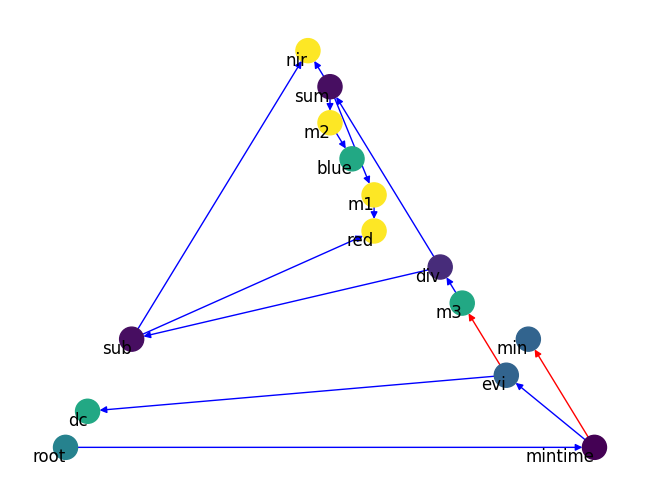

In [19]:
parsed_graph.plot()

In [9]:
nx.get_node_attributes(parsed_graph.G, "resolved_kwargs")

{'root-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb': {'format': 'GTiff'},
 'mintime-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb': {'dimension': 't'},
 'evi-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb': {'dimension': 'bands'},
 'dc-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb': {'id': 'Sentinel-2',
  'spatial_extent': {'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2},
  'temporal_extent': ['2018-01-01', '2018-02-01'],
  'bands': ['B02', 'B04', 'B08']},
 'm3-f5b8bdee-972f-425d-b06d-d0bbf1733abb': {'x': '2.5'},
 'div-f5b8bdee-972f-425d-b06d-d0bbf1733abb': {},
 'sub-f5b8bdee-972f-425d-b06d-d0bbf1733abb': {},
 'nir-f5b8bdee-972f-425d-b06d-d0bbf1733abb': {'label': 'B08',
  'data': ParameterReference(from_parameter='data')},
 'red-f5b8bdee-972f-425d-b06d-d0bbf1733abb': {'label': 'B04',
  'data': ParameterReference(from_parameter='data')},
 'sum-f5b8bdee-972f-425d-b06d-d0bbf1733abb': {'data': [1,
   {'from_node': 'nir',
    'node': {'process_id': 'array_element',
     'arguments': {'data': {'from_parameter': 'dat

In [10]:
parsed_graph.G.edges(data=True)

OutEdgeDataView([('root-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'mintime-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_name': 'data', 'access_function': <function ResultReference.<lambda> at 0x7fde28090dc0>}), ('mintime-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'evi-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_name': 'data', 'access_function': <function ResultReference.<lambda> at 0x7fde28090dc0>}), ('mintime-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'min-9d28b166-01c0-4297-8573-dee134d9b682', {'reference_type': <PGEdgeType.Callback: 'callback'>, 'arg_name': 'reducer'}), ('evi-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', 'dc-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_name': 'data', 'access_function': <function ResultReference.<lambda> at 0x7fde28090dc0>}), ('evi-cb74ce9a-a66d-4469-adaa-7f97a2cc89c

In [11]:
{node: node_name for node, node_name in nx.get_node_attributes(parsed_graph.G, "node_name").items()}

{'root-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb': 'root',
 'mintime-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb': 'mintime',
 'evi-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb': 'evi',
 'dc-cb74ce9a-a66d-4469-adaa-7f97a2cc89cb': 'dc',
 'm3-f5b8bdee-972f-425d-b06d-d0bbf1733abb': 'm3',
 'div-f5b8bdee-972f-425d-b06d-d0bbf1733abb': 'div',
 'sub-f5b8bdee-972f-425d-b06d-d0bbf1733abb': 'sub',
 'nir-f5b8bdee-972f-425d-b06d-d0bbf1733abb': 'nir',
 'red-f5b8bdee-972f-425d-b06d-d0bbf1733abb': 'red',
 'sum-f5b8bdee-972f-425d-b06d-d0bbf1733abb': 'sum',
 'min-9d28b166-01c0-4297-8573-dee134d9b682': 'min'}

In [12]:
import networkx as nx
G = nx.DiGraph()
G.add_edge("here", "there", reference_type="Callback")

In [13]:
for u, v, data in G.in_edges("here", data=True):
    print(type(u))
    print(v)
    if data["reference_type"] == "Callback":
        print(u)
        print(v)